# Computing Direction Tuning with Python in a Jupyter notebook
We're going to use data from [Siegle, Jia et al., bioRxiv 2019](https://www.biorxiv.org/content/10.1101/805010v1) for this notebook. This is Neuropixels data collected in several visual areas in the awake mouse brain, while the mouse is viewing visual stimuli. We'll get the data using the [Allen Software Development Kit](https://allensdk.readthedocs.io/en/latest/), which Python to programmatically access [this data](https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html). There are other example Jupyter notebooks, as well as more documentation for the SDK and Neuropixels datasets at the Allen SDK Neuropixels [link](https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html).
<br>The goal will be to get some spikes times, some stimulus times, and plot direction tuning curves like this one on the right:. 
<br>


![Hubel and Wiesel, 1968](./res/HW68_DS.jpg)

##### Some of the code is pre-written, and you will simply execute it. In other cases, you will be prompted to write some code lines to advance towards this goal. **There are going to be 8 such prompts,** plus some bonus challenges if you want to keep going.

## Imports of packages we will need for this notebook. 
#### All are standard and those that we have talked about, plus the AllenSDK for gettting the data

In [3]:
import numpy as np
import os,sys,glob
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

### Now we will get the Neuropixels data from the Allen Institute servers. 
The details of this are not critical, and can be ignored for now in order to get the rest of this notebook. There are some useful examples of working with a pandas DataFrame, and a desription of class objects for some slightly more advanced Pythoning. You can skip to the big
# ==========================================================

below if you'd like, but you have to run these cells first. So, some Jupyter practice: press ```Shift + Enter``` to run a cell and advance to the next one

In [63]:
data_directory = '~/' 
manifest_path = os.path.join(data_directory, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()

The important result of this  is that we will end up with a pandas DataFrame with sessions (i.e., recording sessions) in it:

In [3]:
print('Total number of sessions: ' + str(len(sessions)))
sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


Because this is a pandas dataframe, we can easilty search the values (for example, for genotype) and filter it (for example, for wild type C57s only, male, with a probe in primary visual cortex (VISp))

For example, what kind of genoypes are there? we can query the pandas DataFrame ```sessions``` with ```.unique()``` to find all of the genotpyes in the DataFrame:

In [4]:
sessions.full_genotype.unique()

array(['Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
       'Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt', 'wt/wt',
       'Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt'], dtype=object)

In [5]:
filtered_sessions = sessions[(sessions.sex == 'M') & \
                             (sessions.full_genotype == 'wt/wt') & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISp' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

filtered_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."


for our purposes, you should choose a session that has ```session_type` =='brain_observatory_1.1'``` and ```['VISp' in acronyms for acronyms in sessions.ecephys_structure_acronyms]```. but beyond that, you could chooose any session. i'll choose the last session in my ```filtered_sessions``` DataFrame:

*note: To save time [and because the AllenSDK is flaky with Neuropixels data], i've downloaded this session already and stored it in the Google cloud such that you can access it directly. I left the AllenSDK call in this cell, but commented it out, so you can see how straightforward it might have been to get this data. You can also see the TimeSeries ipynb.*

In [5]:
from allensdk.brain_observatory.ecephys.ecephys_session import EcephysSession
#AllenSDK
# session = cache.get_session_data(filtered_sessions.index.values[-1])

nwb_path = '/srv/ecephys_session_799864342.nwb'
session = EcephysSession.from_nwb_path(nwb_path)

Now we have all of the data (recorded neural data, stimulus information) for one recording session. let's take a pause and assess what we have. what is the data type of ```session```?

In [6]:
type(session)

allensdk.brain_observatory.ecephys.ecephys_session.EcephysSession

this is a data object that is not a basic type! what is an "EcephysSession"? it's a class object defined by the AllenSDK. classes have functions (methods) of their own, and attributes. both are accessed with by putting a ```.``` after the class object. here's funky line that will tell us what all of the attributes of ```session``` object:

In [22]:
print([attr_or_method for attr_or_method in dir(session) if attr_or_method[0] != '_'])

['DETAILED_STIMULUS_PARAMETERS', 'LazyProperty', 'age_in_days', 'api', 'channel_structure_intervals', 'channels', 'conditionwise_spike_statistics', 'ecephys_session_id', 'from_nwb_path', 'full_genotype', 'get_current_source_density', 'get_inter_presentation_intervals_for_stimulus', 'get_invalid_times', 'get_lfp', 'get_parameter_values_for_stimulus', 'get_pupil_data', 'get_stimulus_epochs', 'get_stimulus_parameter_values', 'get_stimulus_table', 'inter_presentation_intervals', 'invalid_times', 'mean_waveforms', 'metadata', 'num_channels', 'num_probes', 'num_stimulus_presentations', 'num_units', 'optogenetic_stimulation_epochs', 'presentationwise_spike_counts', 'presentationwise_spike_times', 'probes', 'rig_equipment_name', 'rig_geometry_data', 'running_speed', 'session_start_time', 'session_type', 'sex', 'specimen_name', 'spike_amplitudes', 'spike_times', 'stimulus_conditions', 'stimulus_names', 'stimulus_presentations', 'structure_acronyms', 'structurewise_unit_counts', 'units']


In [7]:
v1_units = session.units[session.units.ecephys_structure_acronym == 'VISp']
v1_spike_times = [session.spike_times[cell] for cell in session.units.index[session.units.ecephys_structure_acronym == 'VISp']]
v1_units['spike_times']=v1_spike_times

note: this one might take a few seconds to execute

# ==========================================================
## Now we've got data, let's get to work. Our initial goal is to determine the preferred direction of a neuron in V1. Something like the right side of this figure:

![Hubel and Wiesel, 1968](./res/HW68_DS.jpg)

To generate a plot like this, we need know 
1. the times of the spikes from each neuron, and 
2. the times of the stimuli of the various directions.
<br>


let's start with spike times. above, we got the "units" (a.k.a. "neurons") from primary visual cortex recorded and isolated in this session. Their information is in ```v1_units```. 
<br>**First question of this exercise:<br>Q1. What type of data is ```v1_units```? write some code that will give the answer in the cell below:**

**Q2. How many neurons were recorded in V1 in this recording? write some code that will give the answer in the cell below:**
_note: there is not one way to do this; there are several. any is fine!_

ok, so we have ___ neurons in V1 in this recording. Let's choose one and look at it's spike times. 
<--**if you want, put your answer to how many neurons we have in V1 here**<br>
i'll choose (semi-randomly, unit 951095552):

In [10]:
v1_units.index

Int64Index([951095018, 951094951, 951095026, 951095011, 951095004, 951094989,
            951094929, 951095073, 951095117, 951095109, 951095125, 951095223,
            951095248, 951095275, 951095313, 951095304, 951095346, 951095400,
            951095391, 951095381, 951095450, 951095433, 951095427, 951095419,
            951095408, 951095511, 951095480, 951095469, 951095561, 951095552,
            951095635, 951095627, 951095617, 951095580, 951095572, 951095684,
            951096915, 951096906, 951095664, 951095654, 951095644, 951095739,
            951095732, 951095714, 951095706, 951095699, 951095693, 951095831,
            951095784, 951095777, 951095770, 951095821, 951096925, 951095915,
            951095895, 951095885, 951095926, 951096002, 951096064, 951096043,
            951096942, 951096934, 951096198, 951096951, 951096165, 951096969,
            951096290, 951096257, 951096244, 951097075, 951097066, 951096359,
            951096339, 951096441, 951097051],
           dtype='

In [11]:
chosen_neuron_spike_times = v1_units[v1_units.index==v1_units.index[8]].spike_times.values[0]
print(chosen_neuron_spike_times)

[4.35202398e+00 4.39592399e+00 4.48725734e+00 ... 1.06746421e+04
 1.06787534e+04 1.06794328e+04]


so, now we have ```chosen_neuron_spike_times```, in seconds. how do we get the oriented stimulus times? 

We'll get all of the stimulus information from the ```session``` object. The details of this ```session``` object are beyond the scope here, but the stimlus information is all in a pandas DataFrame in ```session``` so we will get it (and call in ```stimuli```):

In [12]:
stimuli = session.stimulus_presentations
print(type(stimuli))

<class 'pandas.core.frame.DataFrame'>


note: this cell may take a few seconds, be patient

what kind of stimuli were there? we can use the nice ```.unique()``` method of pandas Series (column) or DataFrame (table):

In [13]:
stimuli.stimulus_name.unique()

array(['spontaneous', 'gabors', 'flashes', 'drifting_gratings',
       'natural_movie_three', 'natural_movie_one', 'static_gratings',
       'natural_scenes', 'drifting_gratings_contrast'], dtype=object)

we want  ```'drifting_gratings'```, which is the type of stimulus that has oriented stimuli for making an direction tuning curve. We filter all of the stimuli to get onlu the grating stimuli:

In [14]:
grating_stimuli = session.stimulus_presentations[session.stimulus_presentations.stimulus_name == 'drifting_gratings']
grating_stimuli = grating_stimuli[grating_stimuli.orientation != 'null']
print(grating_stimuli.orientation.unique()) # ignore the fact that this is called "orientation" and not "direction". can't win them all!

[135.0 45.0 0.0 270.0 90.0 180.0 315.0 225.0]


note, we have grating stimuli with various directions, separated by 45º. great for making an direction tuning curve! what else do we know about these grating stimuli? we'll use ```.head()``` to show us just the first five entries in ```grating_stimuli```, that way we can read all of the columns and get a flavor:

In [15]:
grating_stimuli.head()

,color,contrast,frame,orientation,phase,pos,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,,
3798,null,0.8,null,135,"[42471.86666667, 42471.86666667]","[0.0, 0.0]","[250.0, 250.0]",0.04,1590.310709,2,drifting_gratings,1592.312419,4,null,null,2.00171,246
3799,null,0.8,null,135,"[42471.86666667, 42471.86666667]","[0.0, 0.0]","[250.0, 250.0]",0.04,1593.313231,2,drifting_gratings,1595.314911,15,null,null,2.00168,247
3800,null,0.8,null,45,"[42471.86666667, 42471.86666667]","[0.0, 0.0]","[250.0, 250.0]",0.04,1596.315739,2,drifting_gratings,1598.317439,15,null,null,2.00170,248
3801,null,0.8,null,0,"[42471.86666667, 42471.86666667]","[0.0, 0.0]","[250.0, 250.0]",0.04,1599.318261,2,drifting_gratings,1601.319921,1,null,null,2.00166,249
3803,null,0.8,null,135,"[42471.86666667, 42471.86666667]","[0.0, 0.0]","[250.0, 250.0]",0.04,1605.323281,2,drifting_gratings,1607.324941,8,null,null,2.00166,251


notice the column ```start_time```. this is the start of each grating presentation, in seconds. 
<br> so, to get the stimulus times of each grating with an direction of 0º, we filter the ```grating_stimuli``` DataFrame again, and get the ```.start_time``` column:

In [16]:
direction_0_times = grating_stimuli.start_time[grating_stimuli.orientation==0.0].values
print(len(direction_0_times))

75


A grating of direction 0º was shown 75 times.<br>
**Q3: How long (in duration) was each of these 75 presentations? make a variable called ```duration``` and assign it your answer (in seconds). note that ```duration``` should be a ```float```** <br>_hint: look at the other column names in ```grating_stimuli```_

We can now answer the question: for direction X how many spikes did your chosen v1 cell fire during the stimulus presentation period (start time + duration)? We will do so by counting the spike times of our chose v1 cell that occur between ```start_time``` and ```start_time``` + ```duration```. first, i'll write this out in the most explicit way possible, with ```for``` loops and ```if``` statements. <br>For demonstration purposes, let's also time it.

In [140]:
import time

In [158]:
start = time.time()
dir0_counts = []
for start_time in direction_0_times:
    count = 0
    for spike_time in chosen_neuron_spike_times:
        if spike_time > start_time:
            if spike_time < start_time + duration:
                count = count + 1
    dir0_counts.extend([count])
print('that took: '+str(time.time()-start)+' seconds')

that took: 6.57303261756897 seconds


the above code works, but it is pretty slow and inefficent (in terms of lines of code). using ```numpy```'s ```np.where``` function and a python concept called list comprehension, we can do this in one line, and lightning fast:

In [159]:
start = time.time()
dir0_counts2 = [len(np.where((chosen_neuron_spike_times >= start_time) & (chosen_neuron_spike_times <=start_time+duration))[0]) for start_time in direction_0_times]
print('that took: '+str(time.time()-start)+' seconds')

that took: 0.013327360153198242 seconds


note, reassuringly, that we got the same answer:

In [160]:
dir0_counts == dir0_counts2

True

Let's start making our direction tuning curve:

In [153]:
direction = np.array([0]) # in degrees
mean_spike_count = np.array([np.mean(dir0_counts)])

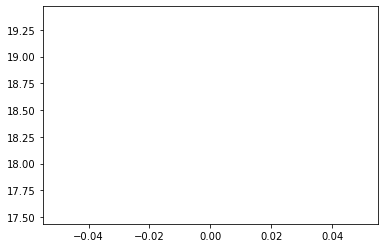

In [155]:
plt.scatter(direction,mean_spike_count)

Welp, the plot didn't work.<br>
**Q4: why not? make the above plot work, without changing the code in the cell. add a cell above it, and then rerun the cell with ```plt.plot(direction,mean_spike_count)``` (or...if it did work...what had you done that made it work?)**

Finally, a plot! Let's finish making our direction tuning curve. We need to iterate over all of the presented directions. <br>
**Q5: What are all of the presented stimulus directions in this session? iterate over all of them, printing them in each iteration**

**Q6: iterate over the stimulus directions again, but this time instead of printing them, count the number of spikes within the duration.** _hint: go back and look at how we did this for dir0_counts2_

**Q7: plot the mean spike count as a function of direction**

In [ ]:
plt.plot(??????)

**Q8: add error bars (standard deviation) to the plot from Q7. use plt.errorbar(), and note that you can measure the standard deviation of a list or array of spike counts with np.std()**<br> this may or may not take a few lines or cells to recompute the standard deviation. feel free to work below!

In [ ]:
plt.errorbar(?????)

Bonus!<br>**Convert the spike counts to firing rate (spikes / sec)**

Bonus!<br>**What is the cells's preferred orientation (the orientation with the highest mean evoked spike count?)**